<a href="https://colab.research.google.com/github/KomilovQobiljon/AIApplicationCourse/blob/main/week6Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.2 kB/s 
     |████████████████████████████████| 2.9 MB 35.7 MB/s 
     |████████████████████████████████| 20.1 MB 86.3 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.8 MB 38.9 MB/s 
     |████████████████████████████████| 503 kB 60.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d4671790e60fea2dc93247d3c07c2a11e3739ee0599c7f82b9e9661f4a61d4d0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully unins

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
learning_parameter = 0.01
epochs = 300

In [ ]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

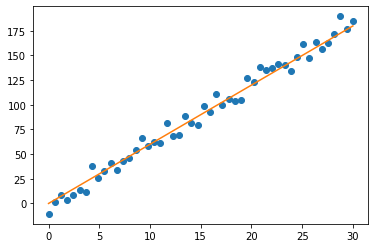

In [ ]:
# Noisy dataset 
plt.plot(x_train,y_train, 'o')
# Noise free dataset
plt.plot(x_train,6*x_train)
plt.show()

In [ ]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

In [ ]:
# Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction - Y)**2/(2*sample_points))

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f
Epochs %f cost %f Weight %f Bias %f


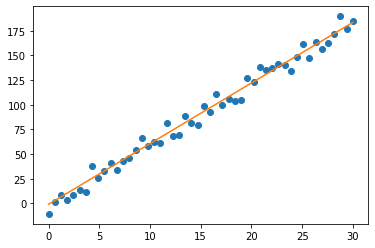

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X: x, Y: y})
      print('Epochs %f cost %f Weight %f Bias %f')
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train + Bias)
  plt.show()


In [ ]:
# Create the model for regression
with tf.name_scope('Model') as scope:
  prediction = W*X + B

#Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram('Weights', W)
bias_histogram = tf.summary.histogram('Bias', B)

# Cost function
with tf.name_scope('Cost_function') as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
const_summary = tf.summary.scalar('Cost', cost_iteration)



In [ ]:
# Define the optimizer
with tf.name_scope('Training') as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

# Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

Epochs 0.000000 cost 0.688288 Weight 5.816681 Bias 1.813868
Epochs 40.000000 cost 0.017022 Weight 6.065197 Bias 1.350024
Epochs 80.000000 cost 0.015326 Weight 6.081884 Bias 0.916112
Epochs 120.000000 cost 0.013866 Weight 6.096996 Bias 0.523192
Epochs 160.000000 cost 0.012607 Weight 6.110680 Bias 0.167391
Epochs 200.000000 cost 0.011519 Weight 6.123071 Bias -0.154796
Epochs 240.000000 cost 0.010577 Weight 6.134291 Bias -0.446546
Epochs 280.000000 cost 0.009758 Weight 6.144452 Bias -0.710733


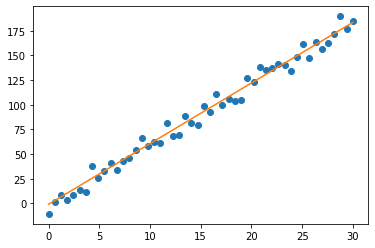

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X: x, Y: y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train + Bias)
  plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tg
!unzip ngrok-v3-stable-linux-amd64.zip

--2022-10-04 07:16:31--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tg
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-10-04 07:16:31 ERROR 404: Not Found.

unzip:  cannot find or open ngrok-v3-stable-linux-amd64.zip, ngrok-v3-stable-linux-amd64.zip.zip or ngrok-v3-stable-linux-amd64.zip.ZIP.


In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://8563-35-227-46-222.ngrok.io


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epochs 0.000000 cost 0.688288 Weight 5.816681 Bias 1.813868
Epochs 40.000000 cost 0.017022 Weight 6.065197 Bias 1.350024
Epochs 80.000000 cost 0.015326 Weight 6.081884 Bias 0.916112
Epochs 120.000000 cost 0.013866 Weight 6.096996 Bias 0.523192
Epochs 160.000000 cost 0.012607 Weight 6.110680 Bias 0.167391
Epochs 200.000000 cost 0.011519 Weight 6.123071 Bias -0.154796
Epochs 240.000000 cost 0.010577 Weight 6.134291 Bias -0.446546
Epochs 280.000000 cost 0.009758 Weight 6.144452 Bias -0.710733


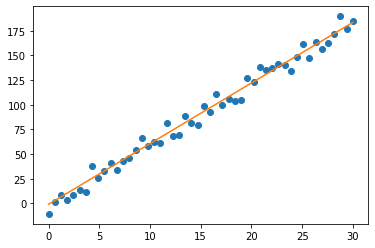

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X: x, Y: y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train + Bias)
  plt.show()